# Pyfolio Portfolio Analysis 

In [9]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
# https://github.com/quantopian/pyfolio
# for documentation 

## Set a benchmark Algo for the SPY to measure performance against the Derivative

In [10]:
def initialize(context):
    context.spy = sid(8554)

    
    set_max_leverage(1.01)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    
def rebalance(context,data):
    order_target_percent(context.spy,1)

In [12]:
# Algo Returns 
benchmark_rets = get_backtest('5e84e9de0b80fa45980bd4ca')
bm_returns = benchmark_rets.daily_performance['returns']
bm_positions = benchmark_rets.pyfolio_positions
bm_transactions = benchmark_rets.pyfolio_transactions

100% Time:  0:00:00|##########################################################|


In [ ]:
## Use the Algo from the Leverage lecture or take this code and run the back test 

# def initialize(context):
#     context.amzn = sid(16841)
#     context.ibm = sid(3766)
    
#     schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
#     schedule_function(record_vars,date_rules.every_day(),time_rules.market_close())
    
# def rebalance(context,data):
#     order_target_percent(context.amzn,2.0)
#     order_target_percent(context.ibm,-2.0)
    
# def record_vars(context,data):
#     record(amzn_close=data.current(context.amzn,'close'))
#     record(ibm_close=data.current(context.ibm,'close'))
#     record(Leverage = context.account.leverage)
#     record(Exposure = context.account.net_leverage)

In [13]:
bt = get_backtest('5e84ebe92c9aee458f220a0b')

100% Time:  0:00:00|##########################################################|


In [14]:
bt_returns = bt.daily_performance['returns']
bt_positions = bt.pyfolio_positions
bt_transactions = bt.pyfolio_transactions

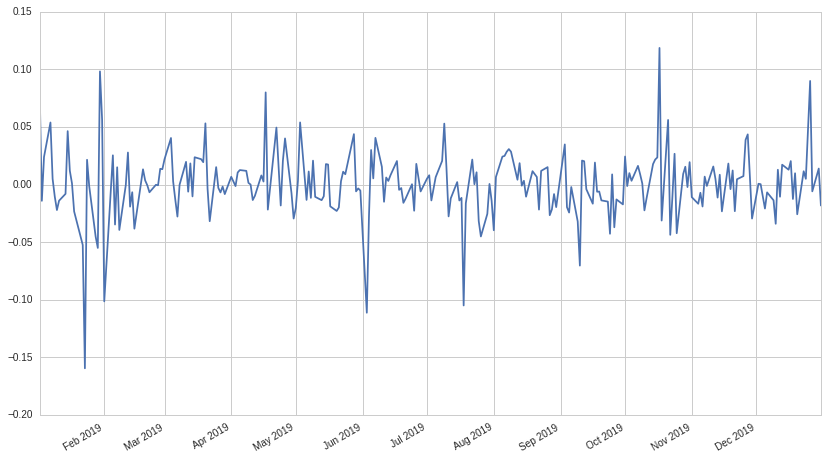

In [15]:
bt_returns.plot()

In [16]:
empyrical.beta(bt_returns,bm_returns)

0.5169249230300572

## Pyfolio Plots 

In [18]:
benchmark_rets = bm_returns

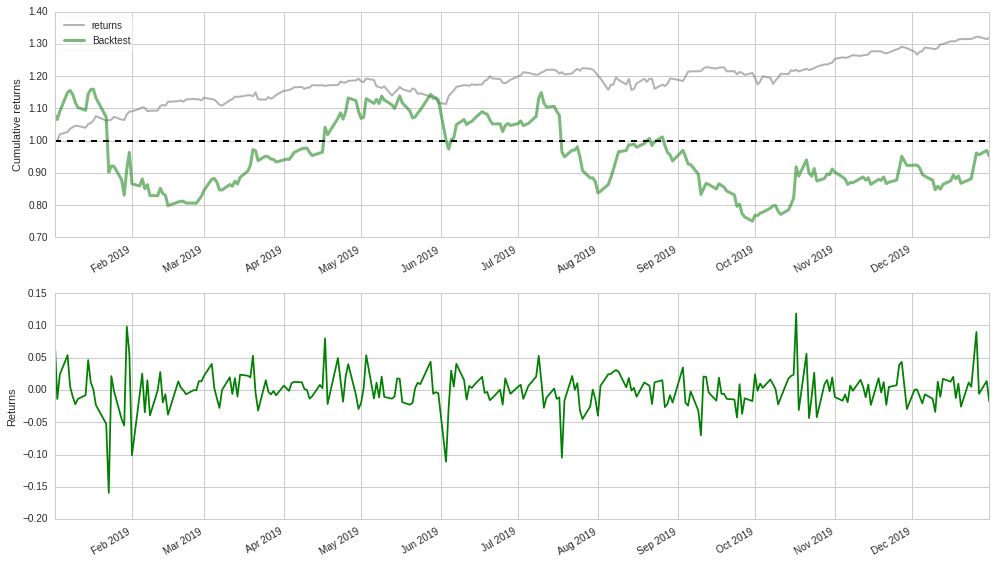

In [19]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

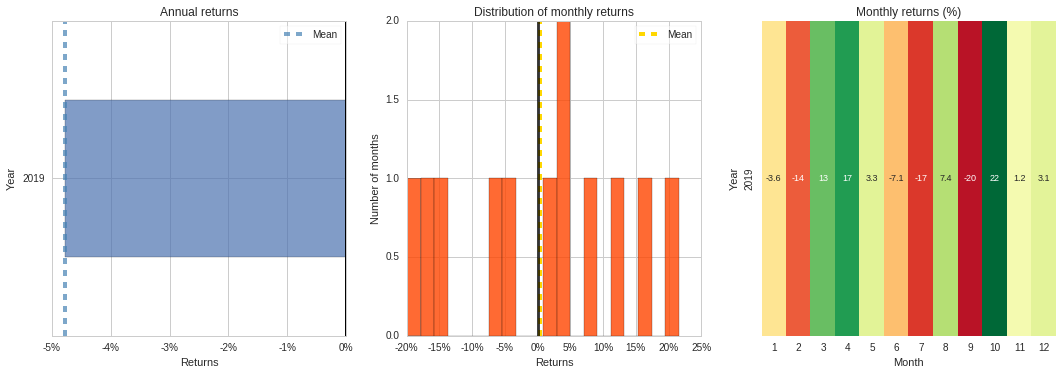

In [20]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

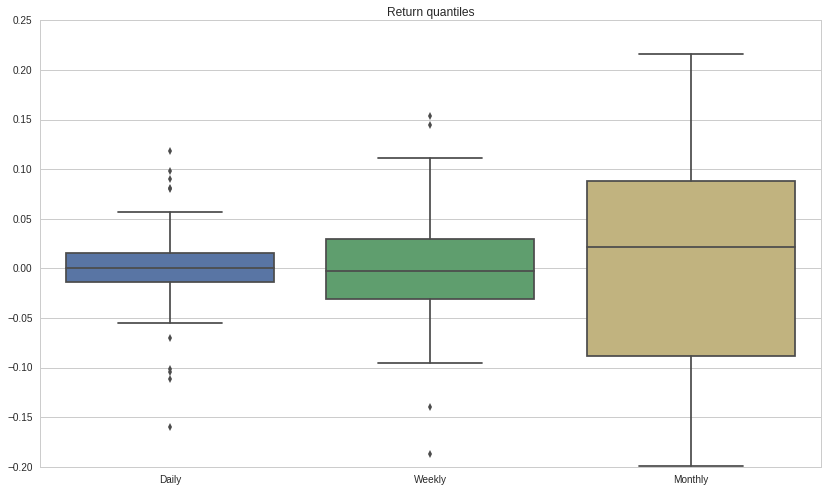

In [21]:
pf.plot_return_quantiles(bt_returns);

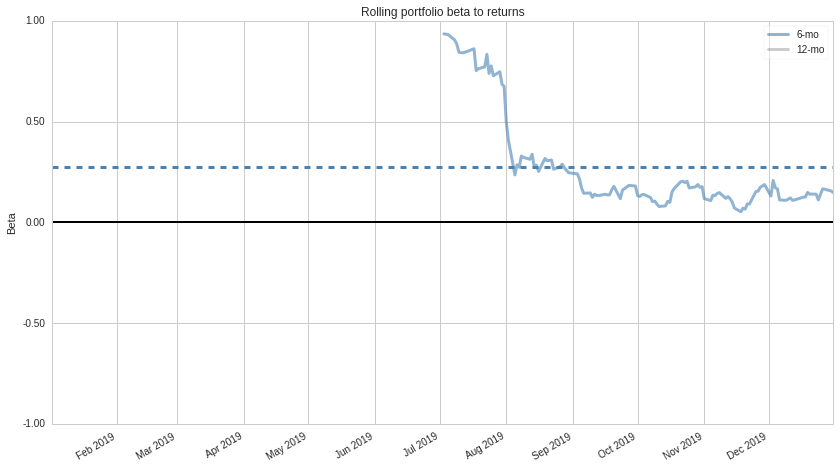

In [22]:
pf.plot_rolling_beta(bt_returns, benchmark_rets);


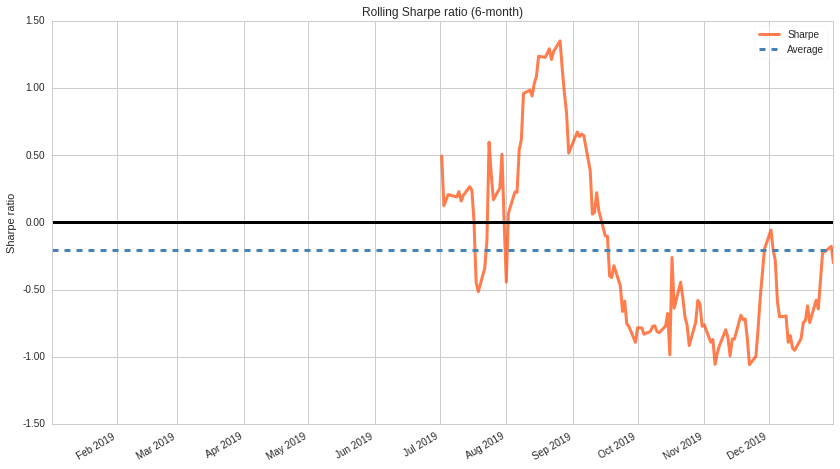

In [23]:
pf.plot_rolling_sharpe(bt_returns);

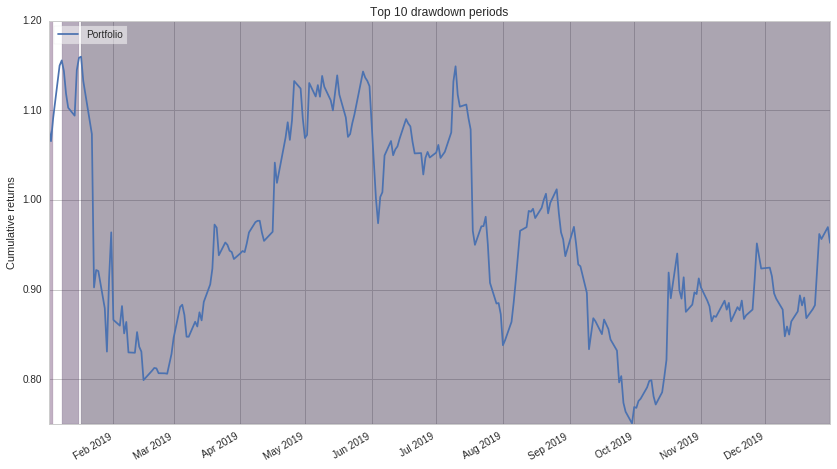

In [25]:
pf.plot_drawdown_periods(bt_returns);

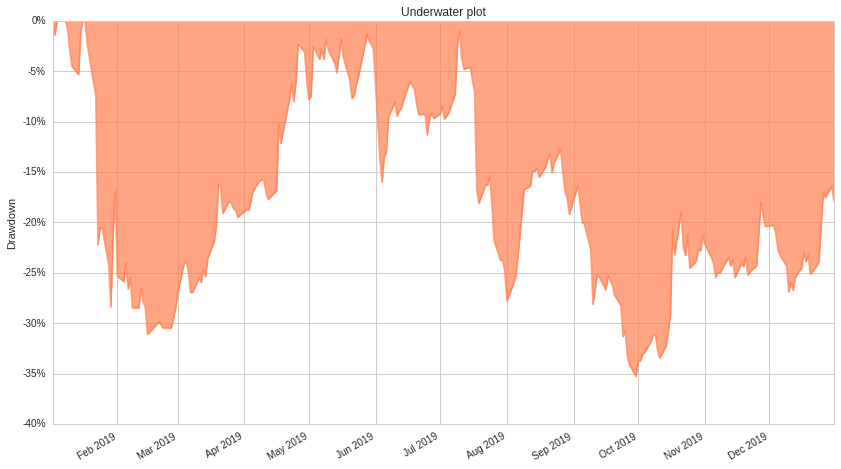

In [26]:
pf.plot_drawdown_underwater(bt_returns);

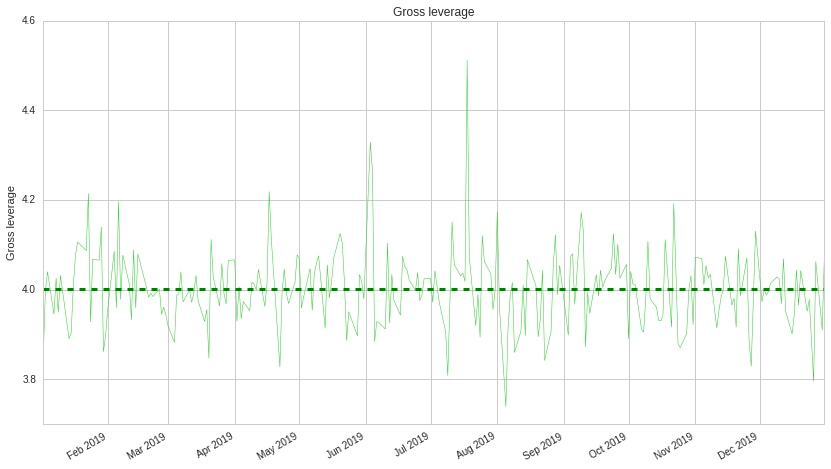

In [27]:
pf.plot_gross_leverage(bt_returns, bt_positions);

Top 10 long positions of all time,max
AMZN-16841,220.46%


Top 10 short positions of all time,max
IBM-3766,-230.74%


Top 10 positions of all time,max
IBM-3766,230.74%
AMZN-16841,220.46%


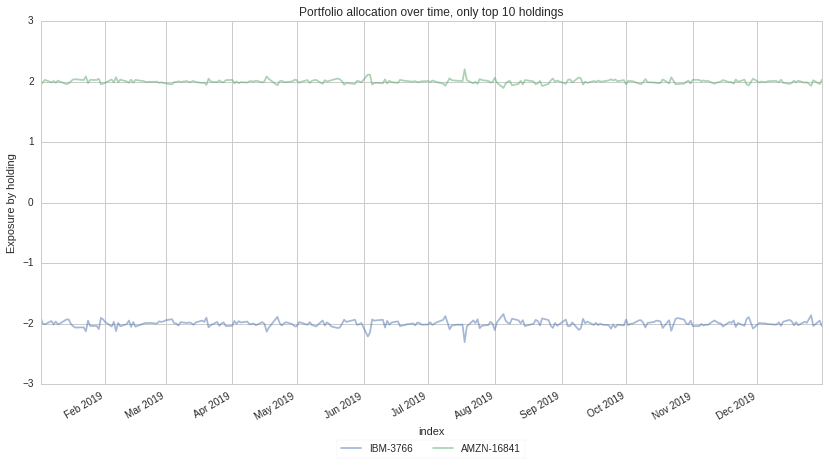

In [28]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

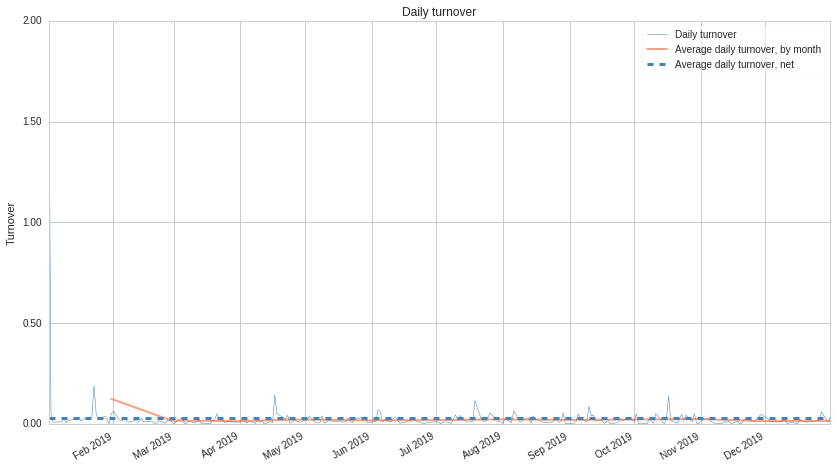

In [29]:
pf.plot_turnover(bt_returns, bt_transactions, bt_positions);

/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


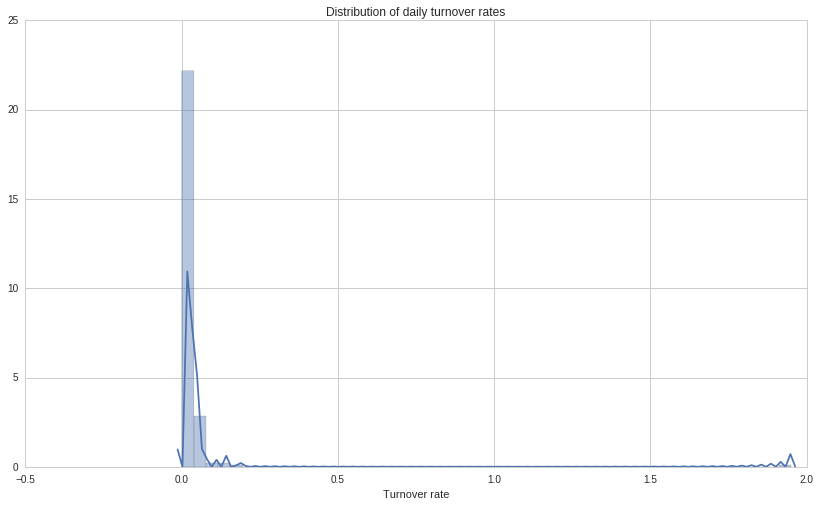

In [30]:
pf.plotting.plot_daily_turnover_hist(bt_transactions, bt_positions);

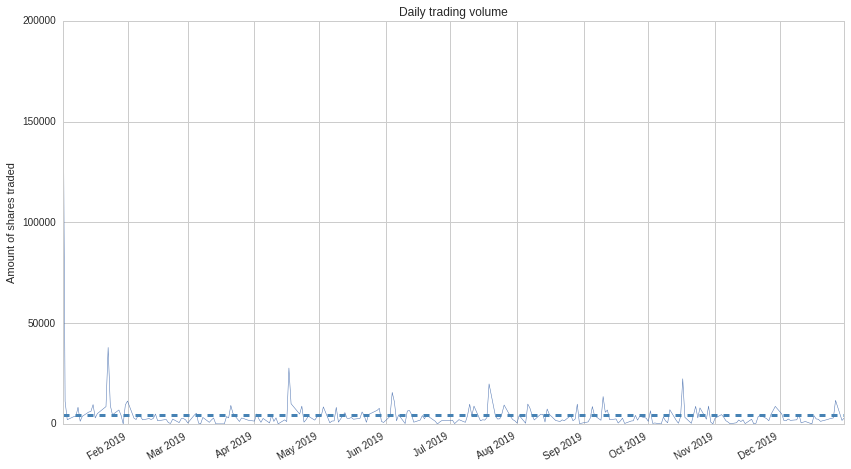

In [31]:
pf.plotting.plot_daily_volume(bt_returns, bt_transactions);

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,265.00,131.00,134.00
Percent profitable,0.51,0.30,0.72
Winning round_trips,136.00,39.00,97.00
Losing round_trips,129.00,92.00,37.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$204041.88,$-4208708.98,$4412750.86
Gross profit,$5689298.24,$759613.46,$4929684.78
Gross loss,$-5485256.36,$-4968322.45,$-516933.92
Profit factor,$1.04,$0.15,$9.54
Avg. trade net profit,$769.97,$-32127.55,$32930.98
Avg. winning trade,$41833.08,$19477.27,$50821.49
Avg. losing trade,$-42521.37,$-54003.50,$-13971.19
Ratio Avg. Win:Avg. Loss,$0.98,$0.36,$3.64
Largest winning trade,$485819.54,$238441.26,$485819.54
Largest losing trade,$-612364.21,$-612364.21,$-65476.47


Duration stats,All trades,Short trades,Long trades
Avg duration,115 days 22:42:20.377358,96 days 19:29:46.259541,134 days 15:38:03.582089
Median duration,116 days 01:00:00,111 days 00:00:00,162 days 23:30:00
Longest duration,208 days 23:00:00,139 days 01:00:00,208 days 23:00:00
Shortest duration,0 days 14:31:59,0 days 14:31:59,0 days 14:31:59


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,-0.00%,0.06%,-0.06%
Avg returns winning,0.42%,0.43%,0.41%
Avg returns losing,-0.45%,-0.26%,-0.68%
Median returns all round_trips,0.00%,-0.01%,0.03%
Median returns winning,0.27%,0.20%,0.27%
Median returns losing,-0.30%,-0.14%,-0.51%
Largest winning trade,5.03%,5.03%,3.05%
Largest losing trade,-5.70%,-1.81%,-5.70%


Symbol stats,AMZN-16841,IBM-3766
Avg returns all round_trips,-0.06%,0.05%
Avg returns winning,0.41%,0.43%
Avg returns losing,-0.69%,-0.26%
Median returns all round_trips,0.04%,-0.02%
Median returns winning,0.27%,0.20%
Median returns losing,-0.51%,-0.14%
Largest winning trade,3.05%,5.03%
Largest losing trade,-5.70%,-1.81%


Profitability (PnL / PnL total) per name,
AMZN-16841,2165.21%
IBM-3766,-2065.21%


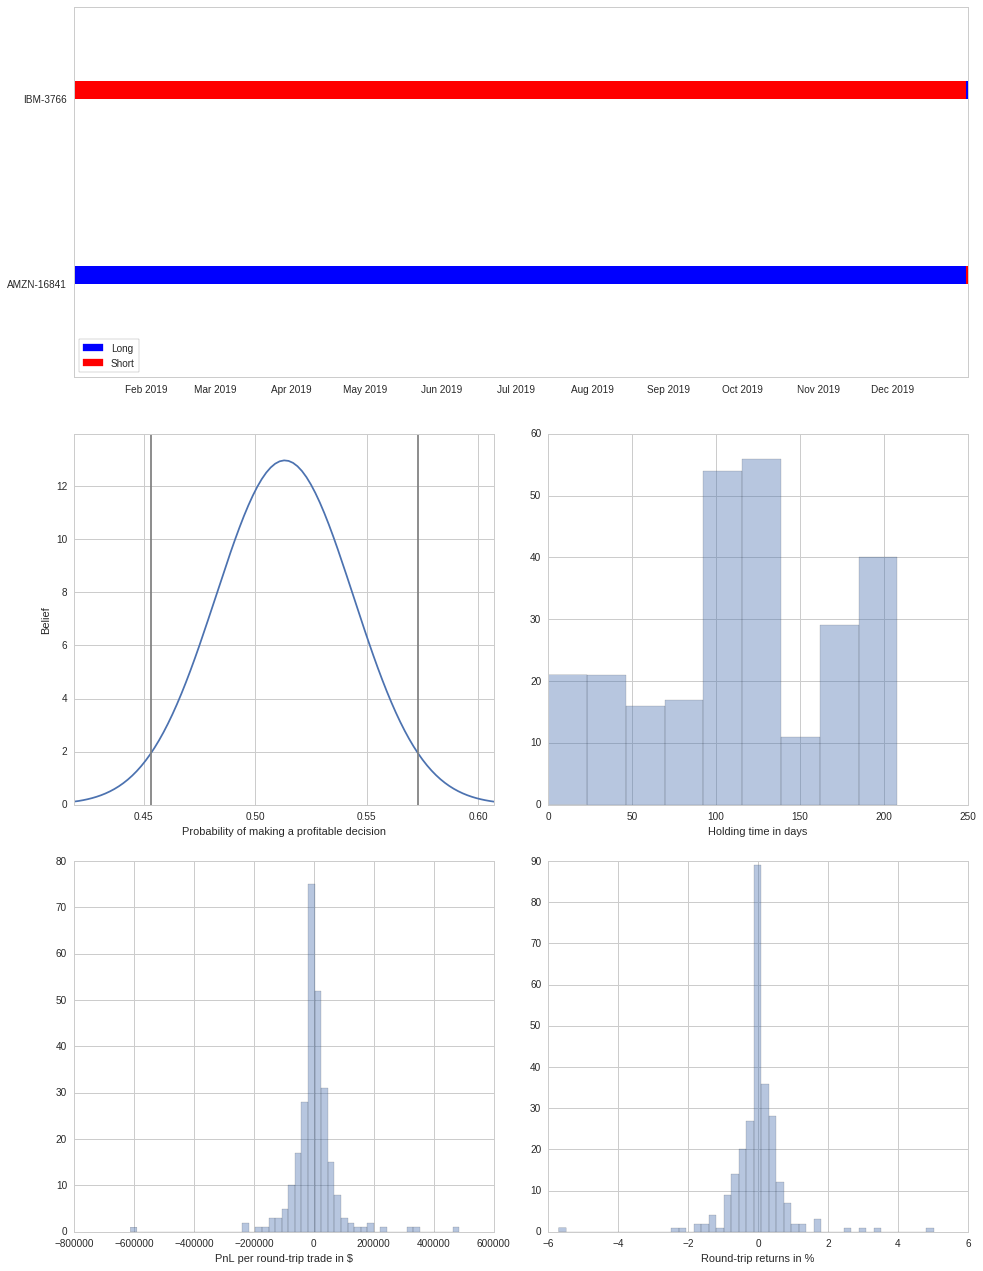

In [32]:
pf.create_round_trip_tear_sheet(bt_returns, bt_positions, bt_transactions);